In [26]:
# OS : macOS-10.16-x86_64-i386-64bit
# Python : 3.10.13
# Numpy : 1.23.5
# Pandas : 1.5.3
# Matplotlib : 3.7.3
# Seaborn : 0.12.2
# Scikit-learn : 1.2.2
# xgboost : 2.0.1
# catboost : 1.1.1
# ipykernel : 6.26.0
# graphviz : 0.20.1
# pycaret : 3.1.0
# Created: NOV. 3. 2023
# Author: D.W. SHIN

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [12]:
iris = load_iris()

In [13]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
data = iris['data']
target = iris['target']
feature_names = iris['feature_names']

iris_df = pd.DataFrame(data, columns=feature_names)
iris_df['target'] = target

In [16]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [17]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
iris_df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [19]:
x_train, x_test, y_train, y_test = train_test_split(iris_df.drop('target', axis=1), iris_df['target'], test_size=0.2, random_state=123, stratify=iris_df['target'])

In [20]:
x_train.shape, x_test.shape

((120, 4), (30, 4))

In [22]:
lr_model = LogisticRegression(random_state=123, max_iter=1000, n_jobs=-1)

In [23]:
lr_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=123)

In [24]:
lr_pred = lr_model.predict(x_test)

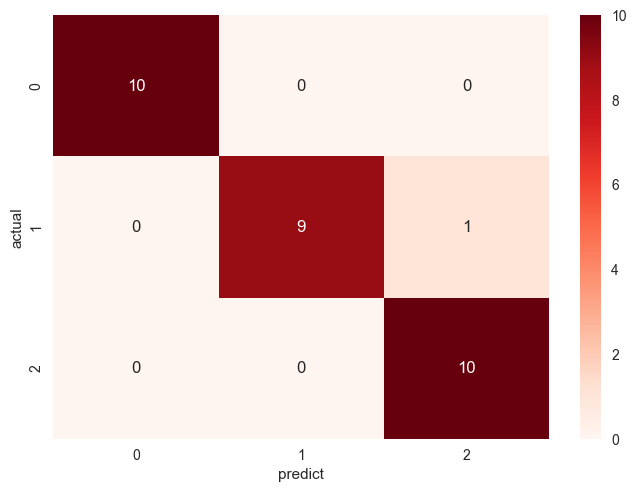

In [28]:
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='Reds')
plt.xlabel('predict')
plt.ylabel('actual')
plt.show()

In [29]:
print('accuracy_score : %f' % accuracy_score(y_test, lr_pred))
print('precision_score : %f' % precision_score(y_test, lr_pred, average='micro'))
print('recall_score : %f' % recall_score(y_test, lr_pred, average='micro'))
print('f1_score : %f' % f1_score(y_test, lr_pred, average='micro'))

accuracy_score : 0.966667
precision_score : 0.966667
recall_score : 0.966667
f1_score : 0.966667
